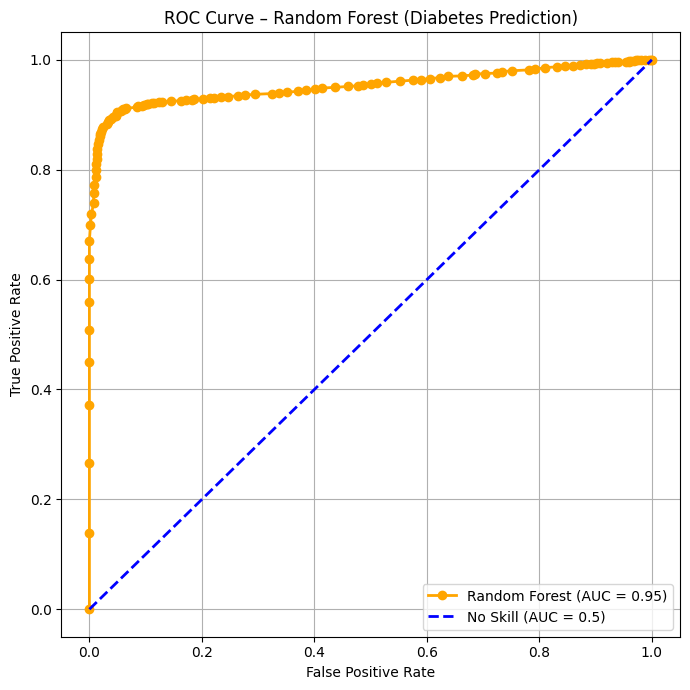

AUC: 0.9525499287401857


In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import roc_curve, auc

df = pd.read_excel("ML470_S5_Diabetes_Cleaned_Data_Concept.xlsx")

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# -----------------------------
# Repeated Stratified K-Fold
# -----------------------------
cv = RepeatedStratifiedKFold(
    n_splits=10,
    n_repeats=3,
    random_state=42
)
model = RandomForestClassifier(
    n_estimators=200,
    bootstrap=True,
    random_state=42
)
# -----------------------------
# Collect predictions
# -----------------------------
y_true_all = []
y_prob_all = []

for train_idx, test_idx in cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]

    y_true_all.extend(y_test)
    y_prob_all.extend(y_prob)
# -----------------------------
# ROC & AUC
# -----------------------------
fpr, tpr, thresholds = roc_curve(y_true_all, y_prob_all)
roc_auc = auc(fpr, tpr)
# -----------------------------
# ROC Curve Plot
# -----------------------------
plt.figure(figsize=(7,7))
plt.plot(
    fpr,
    tpr,
    marker='o',
    linewidth=2,
    label=f"Random Forest (AUC = {roc_auc:.2f})",
    color='orange'
)
plt.plot(
    [0, 1],
    [0, 1],
    linestyle='--',
    linewidth=2,
    label="No Skill (AUC = 0.5)",
    color='blue'
)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Random Forest (Diabetes Prediction)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()

print("AUC:", roc_auc)